<a href="https://colab.research.google.com/github/pravittuteja/My_VGG16/blob/master/VGG16_My.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from sklearn import metrics

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170500096/170498071 [==============================] - 2s 0us/step


In [0]:
model = Sequential()
weight_decay = 0.001
x_shape = [32,32,3]
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
learning_rate = 0.05
lr_decay = 1e-4
lr_drop = 20

sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [0]:
datagen = ImageDataGenerator(
    
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).

In [0]:
def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
    
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [0]:
batch_size = 128
maxepoches = 100


history = model.fit_generator(datagen.flow(x_train, y_train,
                                               batch_size=batch_size),
                                  
                                steps_per_epoch=x_train.shape[0] // batch_size,
                                epochs=maxepoches,
                                validation_data=(x_test, y_test),callbacks=[reduce_lr], verbose=1)

model.save_weights('cifar10vgg.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
390/390 [==============================] - 80s 205ms/step - loss: 24.1551 - acc: 0.2067 - val_loss: 12.9695 - val_acc: 0.1098
Epoch 2/100
390/390 [==============================] - 67s 171ms/step - loss: 23.4433 - acc: 0.2845 - val_loss: 27.1243 - val_acc: 0.1005
Epoch 3/100
390/390 [==============================] - 67s 173ms/step - loss: 8.9986 - acc: 0.3050 - val_loss: 5.6101 - val_acc: 0.1644
Epoch 4/100
390/390 [==============================] - 67s 172ms/step - loss: 4.7216 - acc: 0.3173 - val_loss: 4.5799 - val_acc: 0.1158
Epoch 5/100
390/390 [==============================] - 67s 172ms/step - loss: 2.7061 - acc: 0.4410 - val_loss: 3.2015 - val_acc: 0.2615
Epoch 6/100
390/390 [==============================] - 67s 172ms/step - loss: 1.9937 - acc: 0.5128 - val_loss: 2.2075 - val_acc: 0.4427
Epoch 7/100
390/390 [==============================] - 67s 173ms/step - loss: 1.8108

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(history.history.keys())

10000/10000 [==============================] - 8s 760us/step
Test loss: 0.775109304523468
Test accuracy: 0.8791
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


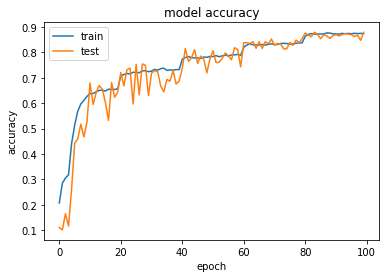

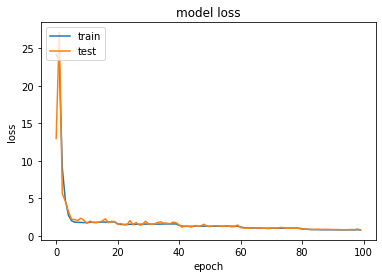

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
Y_pred = model.predict(x_test, verbose=2)


matrix = metrics.confusion_matrix(y_test.argmax(axis=1), Y_pred.argmax(axis=1))
print(matrix)

[[850   8  47  11   5   5   1  17  36  20]
 [  3 955   0   2   1   0   0   0  10  29]
 [ 16   0 881  20  20  26  20  13   4   0]
 [  9   1  54 736  17 121  21  29   6   6]
 [  6   0  26  27 850  30  22  38   1   0]
 [  4   0  24  94  15 839   3  19   0   2]
 [  3   1  48  39   5  20 877   3   2   2]
 [  2   1   5  13  17  15   1 942   1   3]
 [ 16   8   8   5   2   1   2   0 944  14]
 [  6  52   4   9   0   1   2   1   8 917]]


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)       